In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
from sympy import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from scipy.interpolate import interp1d
from scipy import interpolate



<p>
<h1><i><B> Vandermonde Matrix </B></i></h1>
<h3><B>As we have n points we can write n equations and we need n
unknows that will be the coefficients of the polynomial.</B> </h3> 


<h5> example we have 5 points then

Thus:

P4(x)=a0 + a1x + a2x^2 + a3x^3 + a4x^4

that is a0 , a1, a2, a3, a4, that are 5 unknowns and the polynomial degree is 4. In general, the polynomial that passes throught the points (x0,y0),(x1,y1),…,(xn,yn) has a degree of ≤n. 
</h5>
</p>

The equations are:
<pre><B>
P4(x0)=y1            a0 + a1x0 + a2x0^2 + a3x0^3 + a4x0^4=y0 
P4(x1)=y1            a0 + a1x1 + a2x1^2 + a3x1^3 + a4x1^4=y1
P4(x2)=y2            a0 + a1x2 + a2x2^2 + a3x2^3 + a4x2^4=y2
P4(x3)=y3            a0 + a1x3 + a2x3^2 + a3x3^3 + a4x3^4=y3
P4(x4)=y4            a0 + a1x4 + a2x4^2 + a3x4^3 + a4x4^4=y4
</B></pre>

This system coefficient matrix is called Vandermonde's matrix.

In [ ]:
def _pythonpoly(x,y , x_point , degree = None):
    if degree == None:
      degree = len(x) - 1
    pol = np.polyfit(x, y, degree)  # polynomial coefficients
    y_point = np.polyval(pol,x_point) 
    plt.title("python function")
    plt.plot(x,y,'ro')
    plt.plot(x_point , y_point, color='teal', linewidth=2, label='polyfit ')
    plt.plot(x_point , fun(x_point), color='cornflowerblue', linewidth = 2,label="ground truth")
    plt.grid()
    plt.legend()
    #print("using python function error is :", _error(y_point,fun(x_point)) )
    plt.show()
    return _error(y_point,fun(x_point))
    
def _vanderextend(xx , n):
    return np.vander(xx , N = n , increasing=True)

def _vander(x ,y ,x_point ):
    plt.plot(x , y , 'ro')
    x = x.reshape((x.size))
    n = x.size

    y = y.reshape((y.size , 1))
    vm = np.vander(x , N = None , increasing= True)
    vm_inv = np.linalg.inv(vm)
    sol = np.dot(vm_inv , y)
    sol = sol.reshape((sol.size , 1))
    y_point = np.dot(_vanderextend(x_point , n), sol)
    plt.title("vandermarix")
    plt.plot(x_point ,y_point, color='teal', linewidth=2, label='vander matrix')
    plt.plot(x_point , fun(x_point), color='cornflowerblue', linewidth = 2,label="ground truth")
    #print("using vandermarix error is :", _error(y_point,fun(x_point)) )
    plt.grid()
    plt.legend()
    plt.show()
    return _error(y_point,fun(x_point)), sol


def _LagrangeInterp(x, y,x_point):
    x = x.reshape((x.size))
    y = y.reshape((y.size))
    n = x.size
    
    m = x_point.size
    y_point = []
    for k in range(m):
        yp = 0
        for i in range(n):
            p = 1
            for j in range(n):
                if i != j:
                    p = p * (x_point[k] - x[j])/(x[i] - x[j])
            yp = yp + p * y[i] 
        y_point.append(yp)
    
    y_point = np.asarray(y_point, dtype = float) 
    plt.title("Lagrange interpolation")
    plt.plot(x,y,'ro')
    plt.plot(x_point , y_point, color='teal', linewidth=2, label='Lagrange interpolation')
    plt.plot(x_point , fun(x_point), color='cornflowerblue', linewidth = 2,label="ground truth")
    plt.grid()
    plt.legend()
    plt.show()
    #print("using Lagrange interpolation error is :", _error(y_point,fun(x_point)) )
    return _error(y_point,fun(x_point))

def _piecewise(x,y,x_point):
    s = interpolate.InterpolatedUnivariateSpline(x, y)
    y_point = s(x_point)
    plt.title("interpolation with splines")
    plt.plot(x, y, 'ro')
    plt.plot(x_point , y_point , color='teal', linewidth=2, label='spline interpolation')
    plt.plot(x_point , fun(x_point), color='cornflowerblue', linewidth = 2,label="ground truth")
    plt.grid()
    plt.legend()
    plt.show()
    return _error(y_point,fun(x_point))

def ml_model(x ,y ,x_point ,degree = None):
    colors = ['teal', 'yellowgreen','red' ,'black','magenta', 'gold' ,'blue' ,'green' ,'yellow' , 'cyan']
    x = x.reshape((x.size , 1 ))
    y = y.reshape((y.size , 1 ))
    x_point = x_point.reshape(( x_point.size ,1))
    
    if degree != None:
      plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
      model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
      # model = KernelRidge(kernel='poly', degree=degree)
      print(degree)
      model.fit(x, y)
      y_point = model.predict(x_point)
      
      
      plt.plot(x_point, y_point, color=colors[0], linewidth=2, label="ml_model")
      plt.plot(x_point , fun(x_point), color='cornflowerblue', linewidth = 2,label="ground truth")
      plt.legend()
      plt.grid()
      plt.show()
      #print("using polynomial regression error is :", _error(y_point,fun(x_point)) )
      return _error(y_point,fun(x_point))# , model.dual_coef_

    else:
      f, ax = plt.subplots(1, 1, figsize = (10, 15))
      plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
      for i in range(1 ,x.size()):
          # model = make_pipeline(PolynomialFeatures(i), Ridge())
          model = KernelRidge(kernel='poly', degree=i)
          model.fit(x, y)
          y_point = model.predict(x_point)
          plt.plot(x_point, y_point, color=colors[i], linewidth=2 ,label="i %d" % degree)
      
      #plt.plot(x_point , fun(x_point) color='cornflowerblue', linewidth = 2,label="ground truth")
      plt.legend()
      plt.grid()

      
def _error(x, y):
    x = x.reshape(x.size)
    y = y.reshape(y.size)
    err = (x - y)
    err = err ** 2
    return err.sum()
    

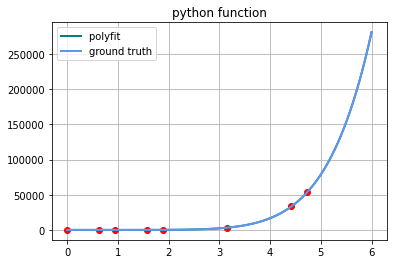

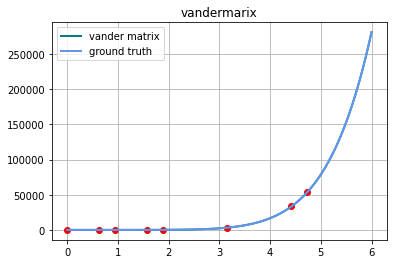

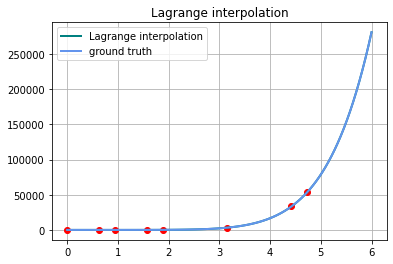

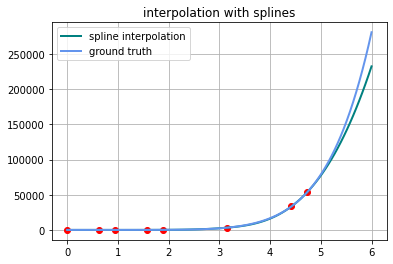

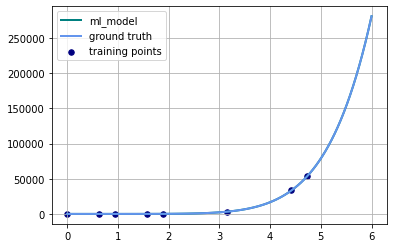

using Lagrange interpolation error is : 1.0648401882382643e-18
using vandermarix error is : 1.8149276022610056e-15
using python function error is : 1.2427405743025119e-18
using interpolation with splines error is : 8855563389.882385
using polynomial regression is : 0.13290837777742176


In [ ]:
# function  x**2 + x ** 4 + x**7 = y

def fun(x):
    return x**2 + x ** 4 + x**7

x_point = np.linspace(0,6,100)
x_get = np.linspace(0,6,20)
np.random.shuffle(x_get)
x = x_get[0:8]
x.sort()


polyerror = _pythonpoly(x,fun(x),x_point)
vanderror = _vander(x,fun(x),x_point)
langerror = _LagrangeInterp(x,fun(x),x_point)
splierror = _piecewise(x, fun(x), x_point)
mlerror = ml_model(x , fun(x) ,x_point , degree = x.size-1)
print("using Lagrange interpolation error is :",  langerror)
print("using vandermarix error is :", vanderror)
print("using python function error is :", polyerror)
print("using interpolation with splines error is :", splierror )
print("using polynomial regression is :", mlerror)
#_piecewise(x,fun(x),x_point)

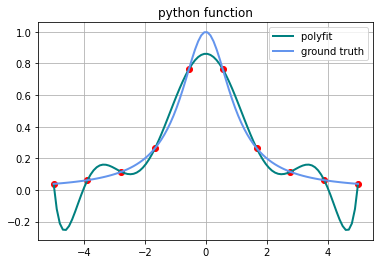

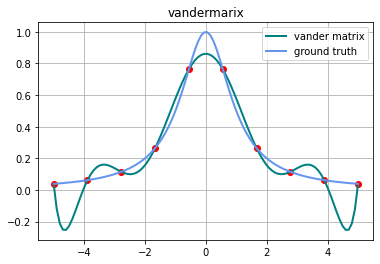

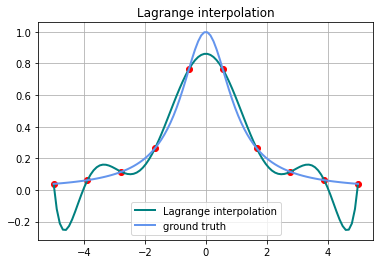

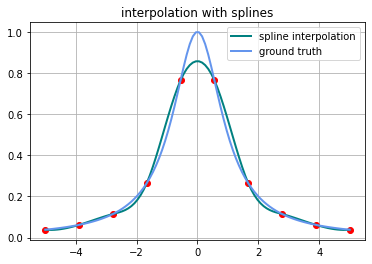

9


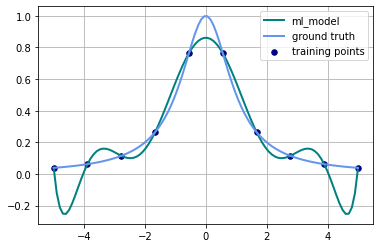

using Lagrange interpolation error is : 1.1888696081316732
using vandermarix error is : (1.188869608132096, array([[ 8.61538152e-01],
       [ 1.09168046e-14],
       [-3.30436933e-01],
       [-1.18194300e-15],
       [ 4.91656481e-02],
       [-4.58075418e-18],
       [-2.87458932e-03],
       [ 3.42201311e-18],
       [ 5.53594234e-05],
       [-9.04207671e-20]]))
using python function error is : 1.1888696081317385
using interpolation with splines error is : 0.16603056272408817
using polynomial regression is : 1.188869608122818


In [ ]:
# function  (1+x**2)**-1 = y

def fun(x):
    return (1 + x**2)**-1

x_point = np.linspace(-5,5,100)
x_get = np.linspace(-5,5,10)
np.random.shuffle(x_get)
x = x_get[0:10]
x.sort()


polyerror = _pythonpoly(x,fun(x),x_point)
vanderror = _vander(x,fun(x),x_point)
langerror = _LagrangeInterp(x,fun(x),x_point)
splierror = _piecewise(x, fun(x), x_point)
mlerror = ml_model(x , fun(x) ,x_point , degree = x.size-1)
print("using Lagrange interpolation error is :",  langerror)
print("using vandermarix error is :", vanderror)
print("using python function error is :", polyerror)
print("using interpolation with splines error is :", splierror )
print("using polynomial regression is :", mlerror)
    

In [ ]:
langerror - mlerror

8.855138844410249e-12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  


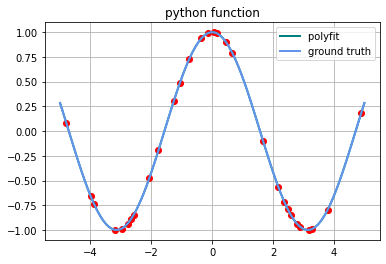

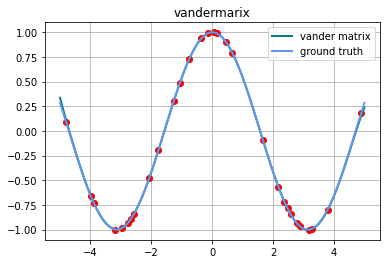

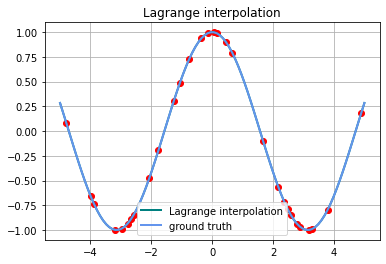

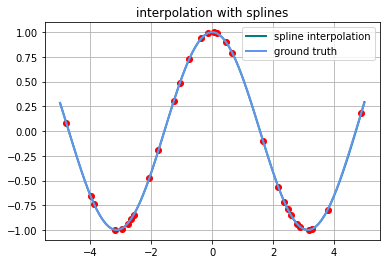

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


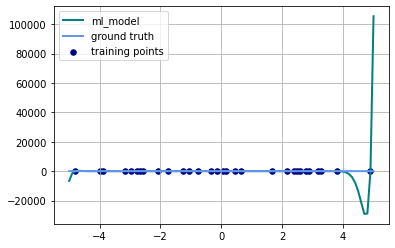

using Lagrange interpolation error is : 7.523920733167522e-11
using vandermarix error is : 0.00959350748914934
using python function error is : 3.6017453418240016e-13
using interpolation with splines error is : 0.000865248201877689
using polynomial regression is : 13544605714.99934


In [ ]:
# function  cosx = y

def fun(x):
    return np.cos(x)


x_point = np.linspace(-5,5,100)
x_get = np.linspace(-5,5,100)
np.random.shuffle(x_get)
x = x_get[0:30]
x.sort()


polyerror = _pythonpoly(x,fun(x),x_point)
vanderror = _vander(x,fun(x),x_point)
langerror = _LagrangeInterp(x,fun(x),x_point)
splierror = _piecewise(x, fun(x), x_point)
mlerror = ml_model(x , fun(x) ,x_point , degree = x.size-1)
print("using Lagrange interpolation error is :",  langerror)
print("using vandermarix error is :", vanderror)
print("using python function error is :", polyerror)
print("using interpolation with splines error is :", splierror )
print("using polynomial regression is :", mlerror)

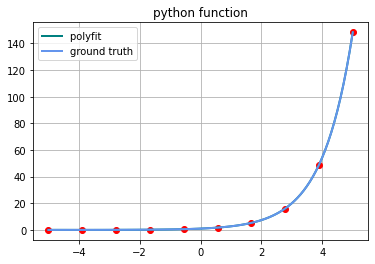

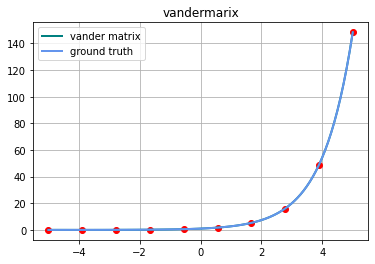

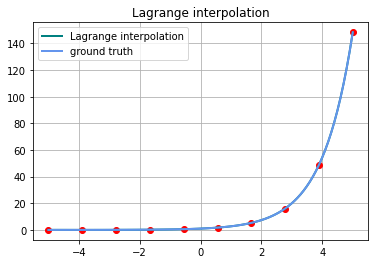

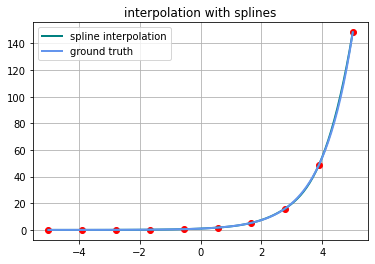

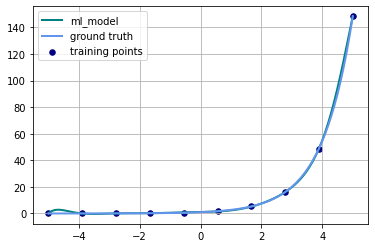

using Lagrange interpolation error is : 0.03782147491157555
using vandermarix error is : 0.03782147491183304
using python function error is : 0.03782147491171444
using interpolation with splines error is : 25.820259691415465
using polynomial regression is : 181.92989097421037


In [ ]:
# function  e^x = y

def fun(x):
    return np.exp(x)


x_point = np.linspace(-5,5,100)
x_get = np.linspace(-5,5,10)
np.random.shuffle(x_get)
x = x_get[0:10]
x.sort()


polyerror = _pythonpoly(x,fun(x),x_point)
vanderror = _vander(x,fun(x),x_point)
langerror = _LagrangeInterp(x,fun(x),x_point)
splierror = _piecewise(x, fun(x), x_point)
mlerror = ml_model(x , fun(x) ,x_point , degree = x.size)
print("using Lagrange interpolation error is :",  langerror)
print("using vandermarix error is :", vanderror)
print("using python function error is :", polyerror)
print("using interpolation with splines error is :", splierror )
print("using polynomial regression is :", mlerror)

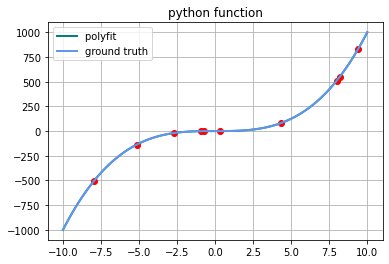

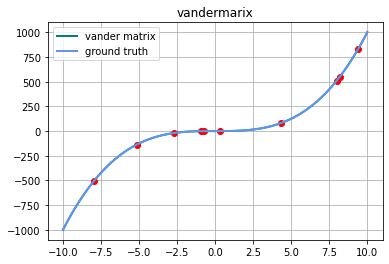

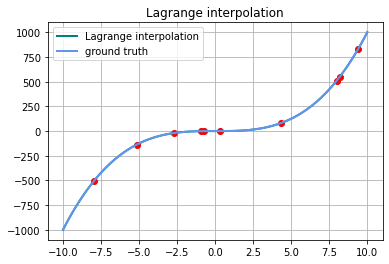

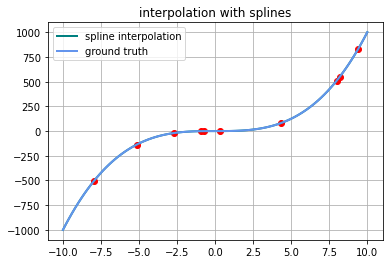

3


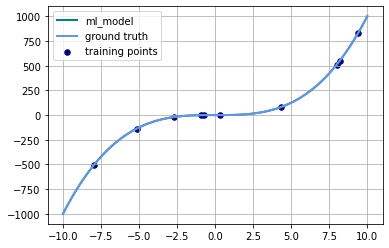

using Lagrange interpolation error is : 3.478406972084378e-21
using vandermarix error is : 5.915348172095119e-19
using python function error is : 1.6483975087510453e-21
using interpolation with splines error is : 1.42587088645038e-24
using polynomial regression is : 1.5406403549548525e-24
[ 0.64442979  0.46303623 -1.1214624 ]
[[-7.77022890e-12]
 [-1.44173562e-12]
 [-7.10542736e-14]
 [ 1.00000000e+00]
 [-2.73114864e-14]
 [ 4.44089210e-16]
 [ 1.11022302e-15]
 [-6.24500451e-17]
 [-1.08420217e-17]
 [ 8.13151629e-19]]
[[ 3.27620002e-13]
 [-1.52210701e-11]
 [-5.84328585e-12]
 [-2.93135753e-13]
 [-5.77044314e-15]
 [ 2.37393571e-13]
 [ 4.09968073e-12]
 [ 2.36945955e-12]
 [-1.16264455e-12]
 [ 5.15050812e-14]]


In [ ]:
rai = np.random.normal(0, 1, 3)

def fun(x):
    _tmp = 1
    ans = 0
    for i in rai:
        ans += _tmp * i
        _tmp *= x
    return _tmp
    

x_point = np.linspace(-10,10,100)
x_get = np.linspace(-10,10,100)
np.random.shuffle(x_get)
x = x_get[0:10]
x.sort()


polyerror = _pythonpoly(x,fun(x),x_point)
vanderror, coeffs_vander = _vander(x,fun(x),x_point)
langerror = _LagrangeInterp(x,fun(x),x_point)
splierror = _piecewise(x, fun(x), x_point)
mlerror = ml_model(x , fun(x) ,x_point , degree = 3)
print("using Lagrange interpolation error is :",  langerror)
print("using vandermarix error is :", vanderror)
print("using python function error is :", polyerror)
print("using interpolation with splines error is :", splierror )
print("using polynomial regression is :", mlerror)
print(rai, coeffs_vander, coeffs_ml, sep="\n")

0


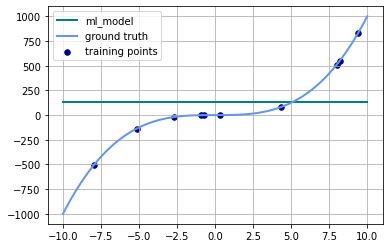

16854496.463331535
1


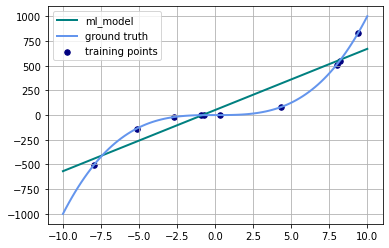

2689092.775264404
2


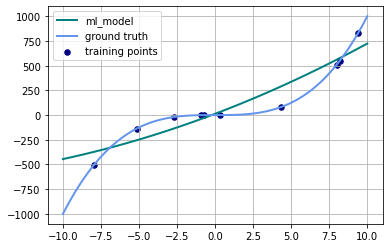

2912379.313103782
3


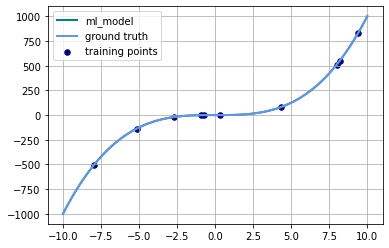

1.5406403549548525e-24
4


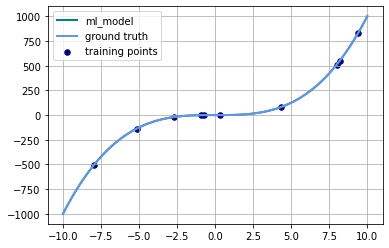

1.7067141031670778e-23
5


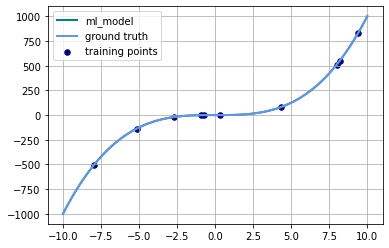

2.872024184503927e-23
6


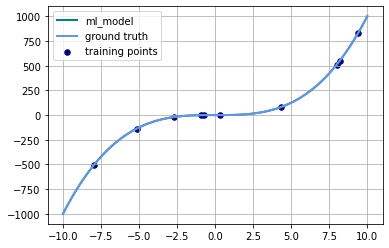

4.371318758093481e-22
7


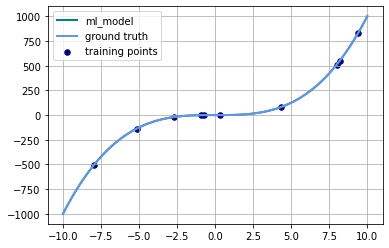

2.5329299311375044e-20
8


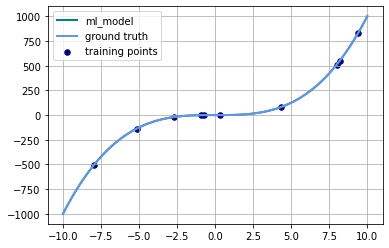

1.1059215785458563e-17
9


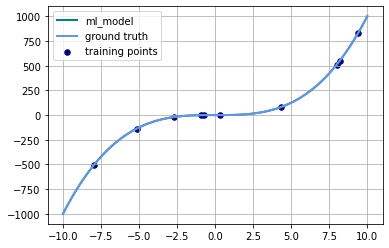

5.799115001560747e-16


In [ ]:
for i in range(10):
    mlerror = ml_model(x , fun(x) ,x_point , degree = i)
    print(mlerror)

<center><h1>Error sensitivity</h1></center>

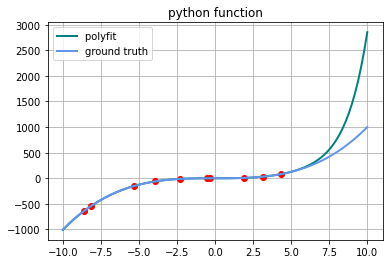

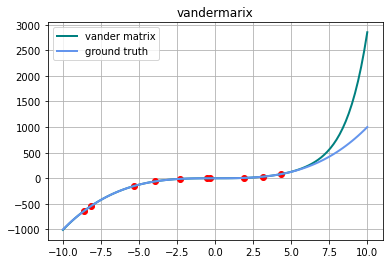

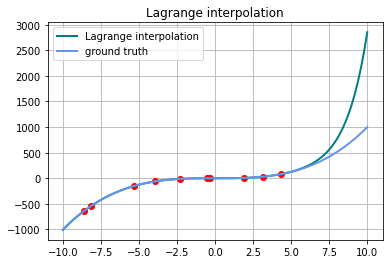

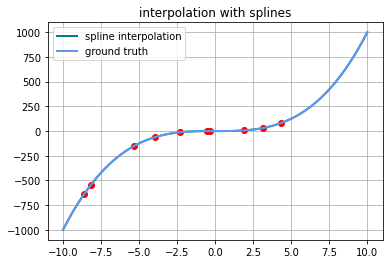

3


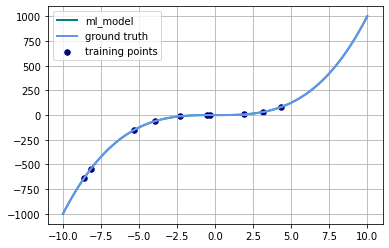

using Lagrange interpolation error is : 10922229.878232282
using vandermarix error is : 10922229.878251275
using python function error is : 10922229.87822168
using interpolation with splines error is : 0.2968489273217645
using polynomial regression is : 0.0870671028771425
[-0.58989294 -0.93444721  0.19173236]
[[-2.70906865e-02]
 [-6.28478197e-02]
 [ 5.00177152e-04]
 [ 1.02218631e+00]
 [ 2.45400143e-03]
 [-2.09045278e-03]
 [-3.63797243e-04]
 [ 4.48809307e-05]
 [ 1.26091133e-05]
 [ 6.69076386e-07]]
[[ 3.27620002e-13]
 [-1.52210701e-11]
 [-5.84328585e-12]
 [-2.93135753e-13]
 [-5.77044314e-15]
 [ 2.37393571e-13]
 [ 4.09968073e-12]
 [ 2.36945955e-12]
 [-1.16264455e-12]
 [ 5.15050812e-14]]


In [ ]:
rai = np.random.normal(0, 1, 3)

def fun(x):
    _tmp = 1
    ans = 0
    for i in rai:
        ans += _tmp * i
        _tmp *= x
    return _tmp
    

x_point = np.linspace(-10,10,100)
x_get = np.linspace(-10,10,100)
np.random.shuffle(x_get)
x = x_get[0:10]
x.sort()

err = np.random.normal(0, 1, len(x))*0.01

polyerror = _pythonpoly(x,fun(x) + err, x_point)
vanderror, coeffs_vander = _vander(x,fun(x) + err, x_point)
langerror = _LagrangeInterp(x,fun(x) + err, x_point)
splierror = _piecewise(x, fun(x) + err, x_point)
mlerror = ml_model(x , fun(x) + err, x_point , degree = 3)
print("using Lagrange interpolation error is :",  langerror)
print("using vandermarix error is :", vanderror)
print("using python function error is :", polyerror)
print("using interpolation with splines error is :", splierror )
print("using polynomial regression is :", mlerror)
print(rai, coeffs_vander, coeffs_ml, sep="\n")